## Importar Bibliotecas

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib.ticker import EngFormatter, FuncFormatter

sns.set_theme(style="whitegrid", palette="pastel")
so.Plot.config.theme.update(sns.axes_style("whitegrid"))


### Importação dos dados



In [146]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

In [147]:
datype ={'Produto': 'string', 'cat_produto': 'string', 'vendedor': 'string', 'tipo_compra':'category', 'local_compra':'string'}
col = ['produto', 'cat_produto', 'preco', 'frete', 'Data da Compra', 'vendedor', 'local_compra', 'nota_compra', 'tipo_pagamento', 'qtd_parcelas', 'lat', 'lon']

loja1 = pd.read_csv(url,  header=0, names=col, dtype=datype)
loja2 = pd.read_csv(url2, header=0, names=col, dtype=datype)
loja3 = pd.read_csv(url3, header=0, names=col, dtype=datype)
loja4 = pd.read_csv(url4, header=0, names=col, dtype=datype)

Converter em Tipo datatype

In [148]:
#Loja 1
loja1['data_compra'] = pd.to_datetime(loja1['Data da Compra'], format="%d/%m/%Y")
loja1.pop('Data da Compra')
loja1['ano']= loja1.data_compra.dt.year
loja1['trimestre']= loja1.data_compra.dt.quarter
#Loja 2
loja2['data_compra'] = pd.to_datetime(loja2['Data da Compra'], format="%d/%m/%Y")
loja2.pop('Data da Compra')
loja2['ano']= loja2.data_compra.dt.year
loja2['trimestre']= loja2.data_compra.dt.quarter
#Loja 3
loja3['data_compra'] = pd.to_datetime(loja3['Data da Compra'], format="%d/%m/%Y")
loja3.pop('Data da Compra')
loja3['ano']= loja3.data_compra.dt.year
loja3['trimestre']= loja3.data_compra.dt.quarter
#Loja 4
loja4['data_compra']= pd.to_datetime(loja4['Data da Compra'], format="%d/%m/%Y")
loja4.pop('Data da Compra')
loja4['ano']= loja4.data_compra.dt.year
loja4['trimestre']= loja4.data_compra.dt.quarter

In [149]:
#loja1.info()
loja1.data_compra.tail()

2354   2021-11-15
2355   2023-03-18
2356   2021-07-06
2357   2022-05-02
2358   2022-06-18
Name: data_compra, dtype: datetime64[ns]

#1. Análise do faturamento


# 2. Vendas por Categoria


In [150]:
#Loja_01
cat_loja1 = loja1.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja1 = cat_loja1.groupby('ano')['preco'].sum().reset_index()

#Loja_02
cat_loja2 = loja2.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja2 = cat_loja2.groupby('ano')['preco'].sum().reset_index()

#Loja_03
cat_loja3 = loja3.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja3 = cat_loja3.groupby('ano')['preco'].sum().reset_index()

#Loja_04
cat_loja4 = loja4.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja4 = cat_loja4.groupby('ano')['preco'].sum().reset_index()

#frames = [cat_loja1, cat_loja2, cat_loja3, cat_loja4]
#vendas_categorias = pd.concat(frames)



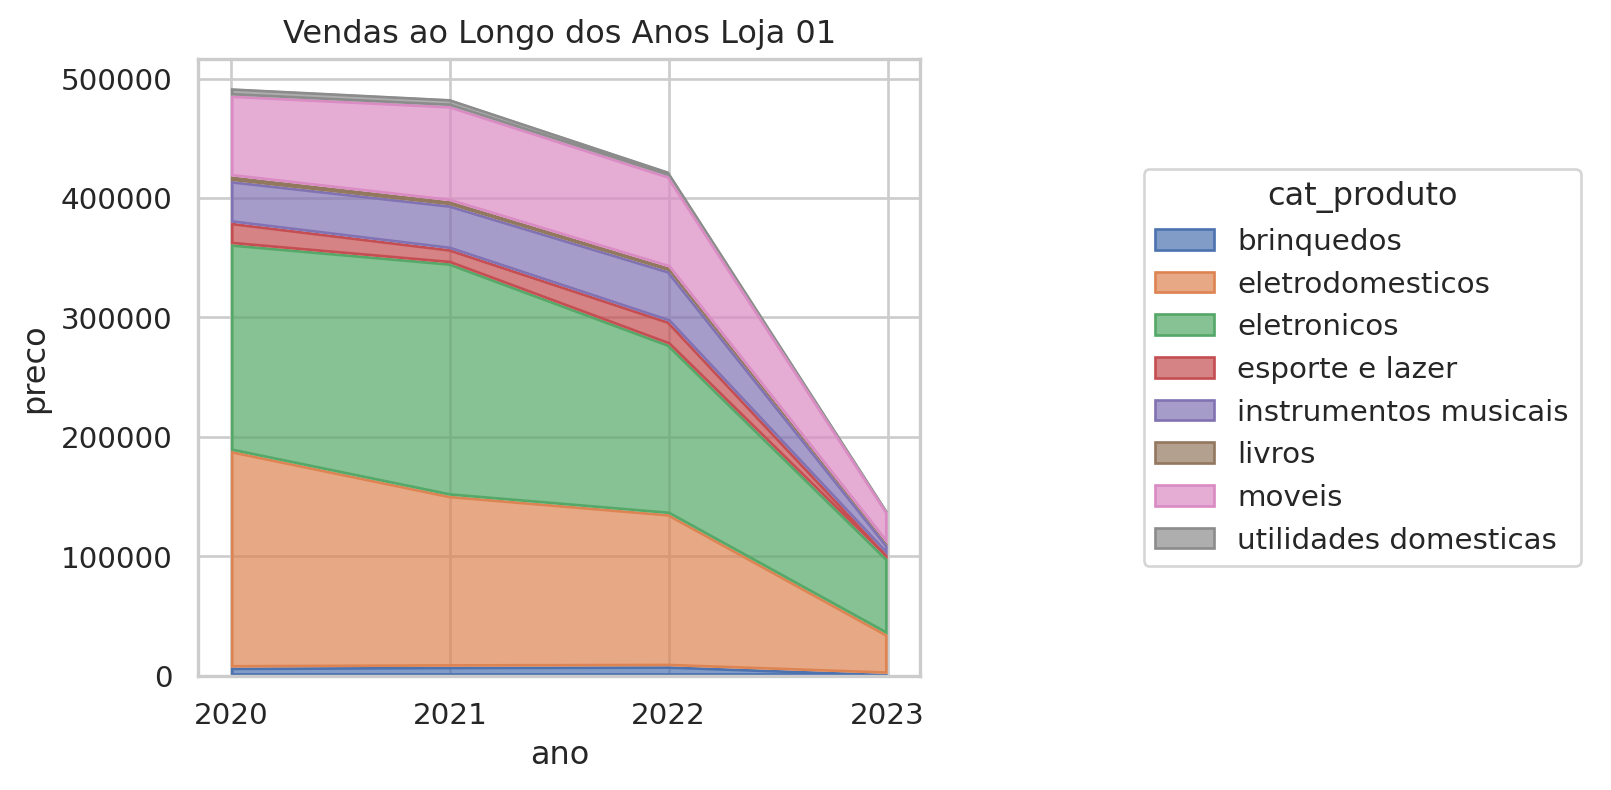

In [151]:
( # LOJA 01
    so.Plot(cat_loja1, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 01').scale(x=so.Continuous().tick(every=1))             
)

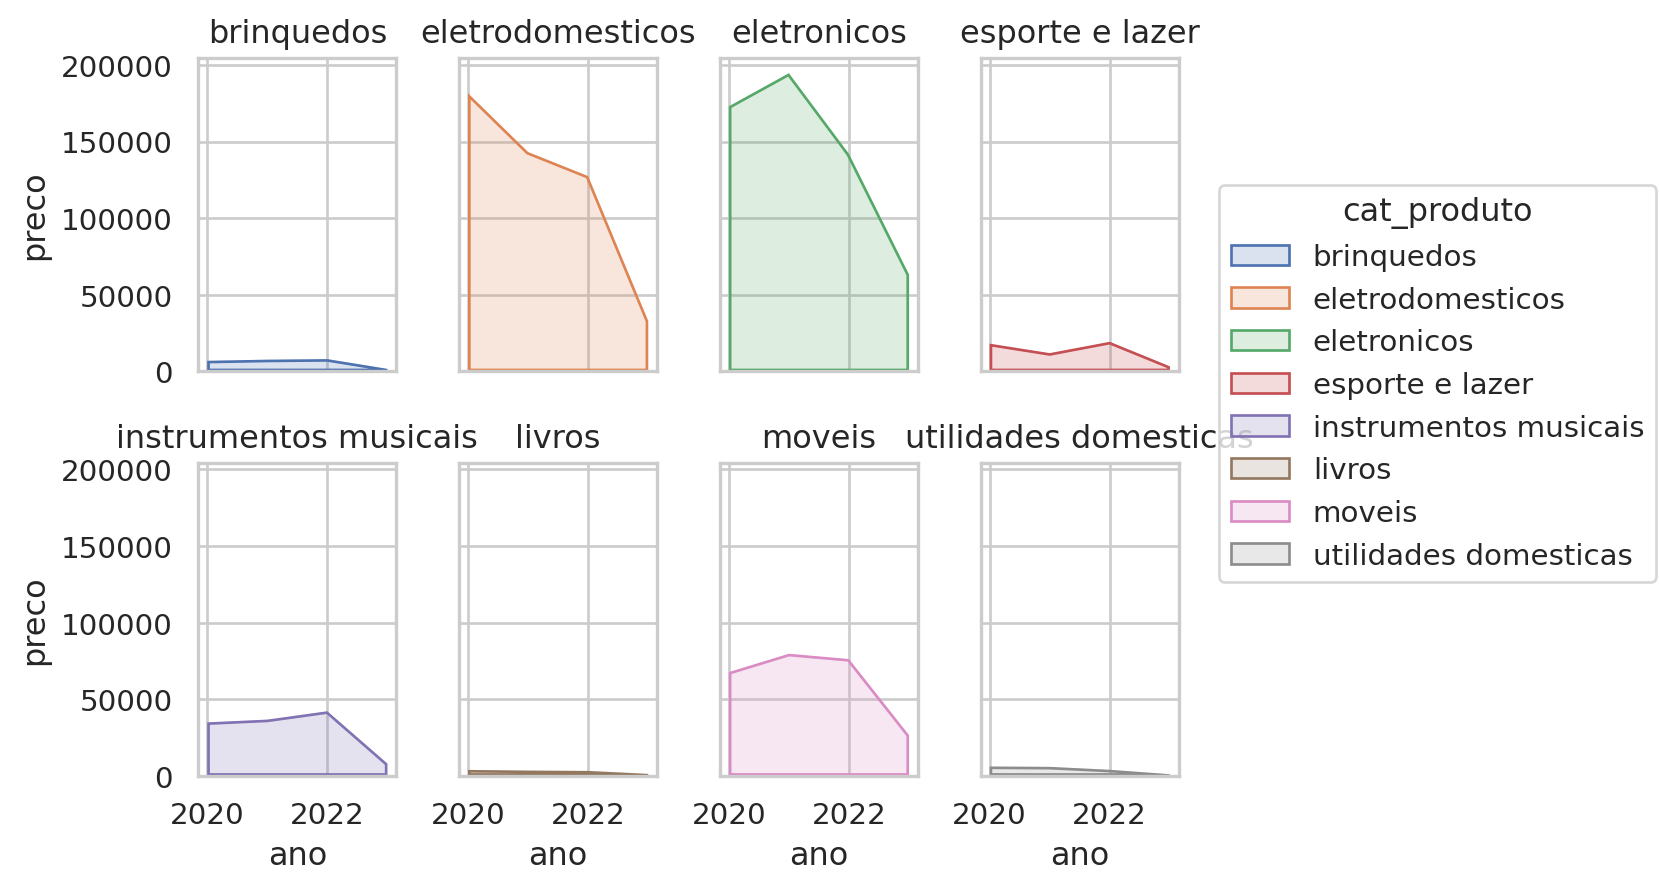

In [152]:
(
    so.Plot(cat_loja1, x='ano', y='preco').facet('cat_produto', wrap=4)
    .add(so.Area(),color='cat_produto').scale(x=so.Continuous().tick(every=2))
)

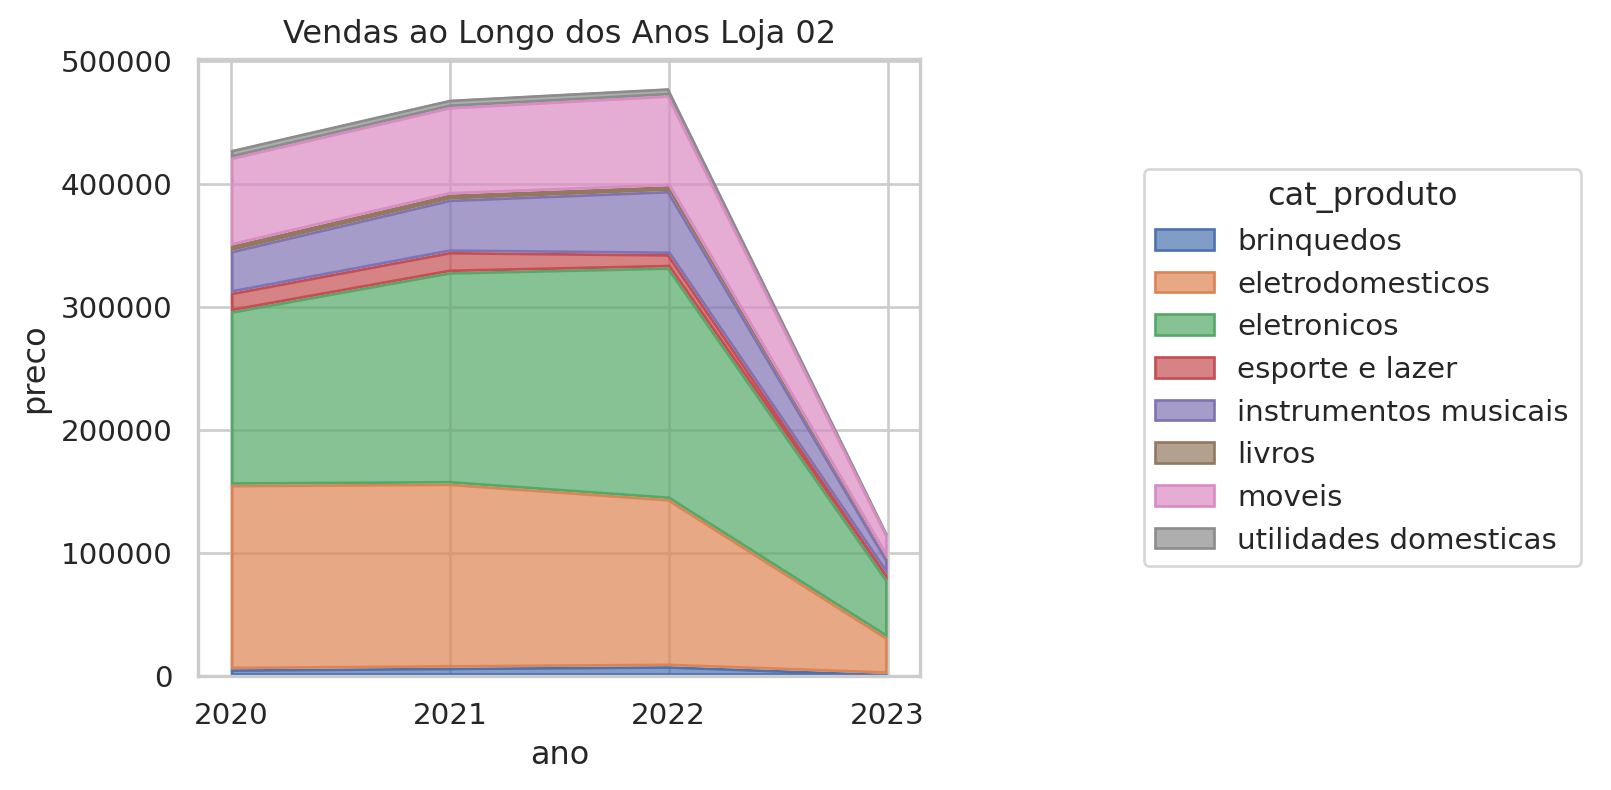

In [153]:
( # LOJA 02
    so.Plot(cat_loja2, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 02').scale(x=so.Continuous().tick(every=1))             
)

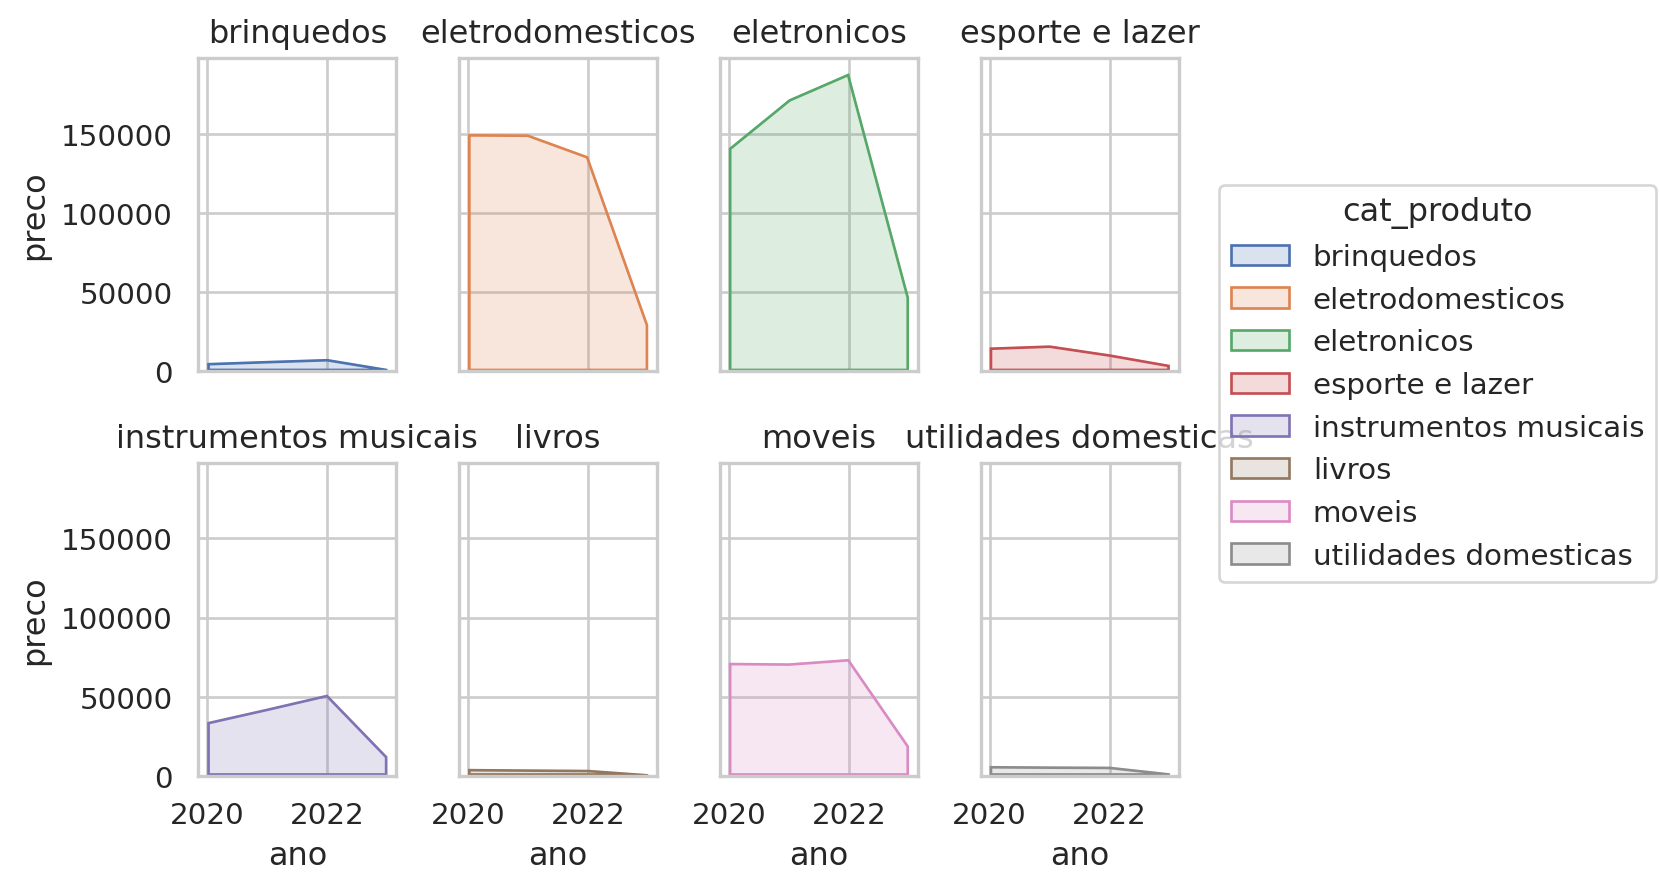

In [154]:
(
    so.Plot(cat_loja2, x='ano', y='preco').facet('cat_produto', wrap=4)
    .add(so.Area(),color='cat_produto').scale(x=so.Continuous().tick(every=2))
)

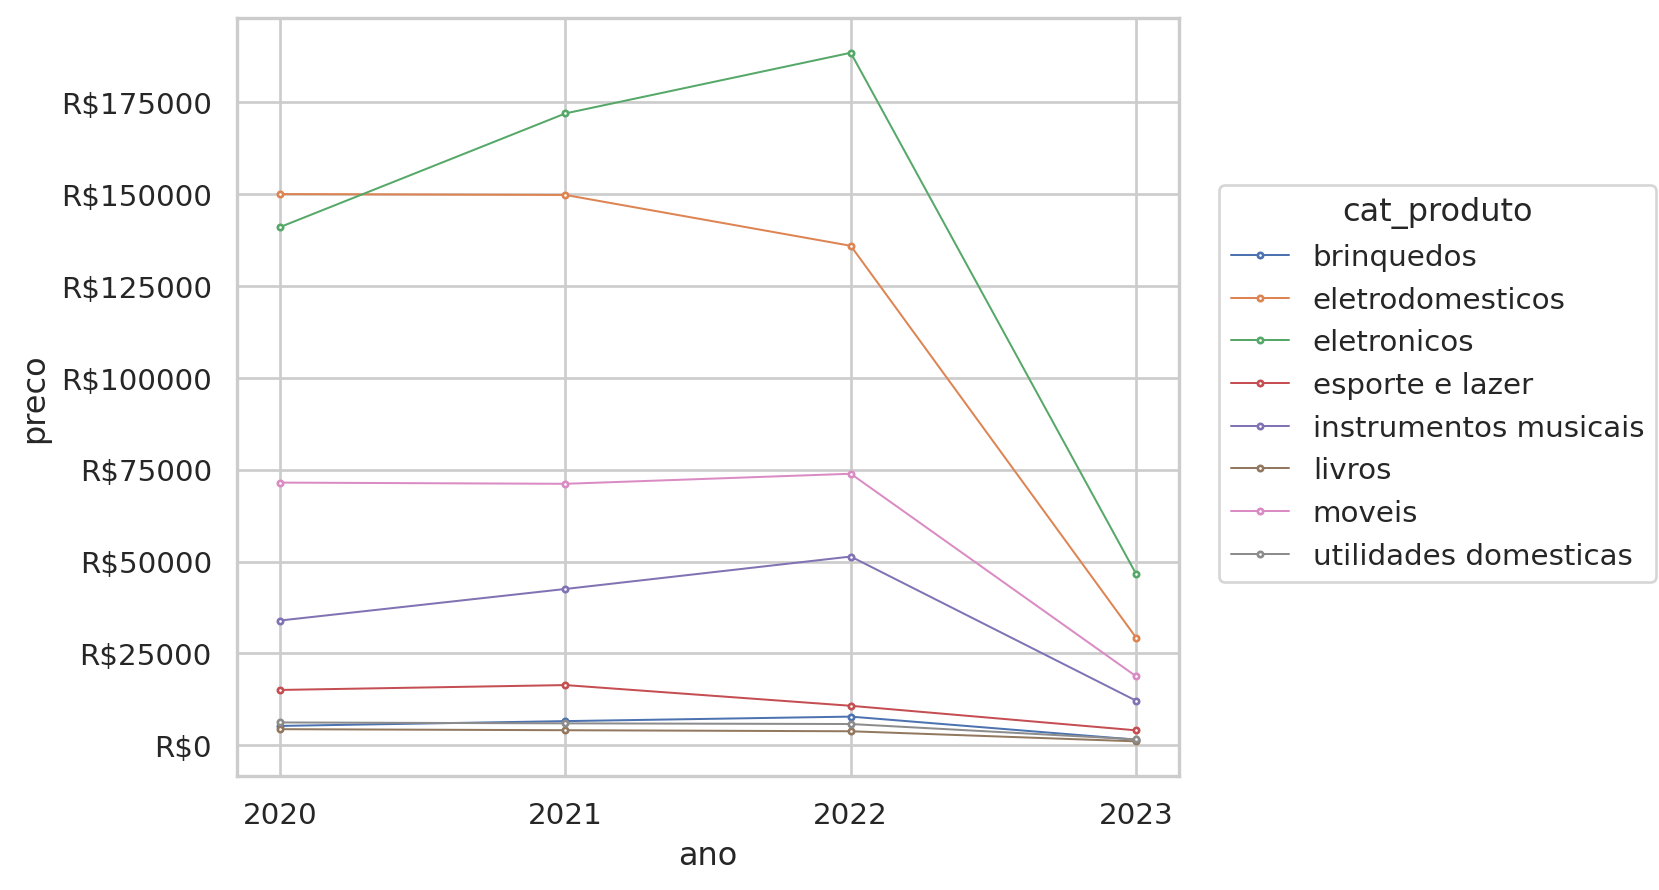

In [155]:
## LOJA 02
p2 = so.Plot(cat_loja2, y='preco', x='ano', color='cat_produto').scale(
    x=so.Continuous().tick(every=1),
    y=so.Continuous().label(like="R${x:g}")
)
p2.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))

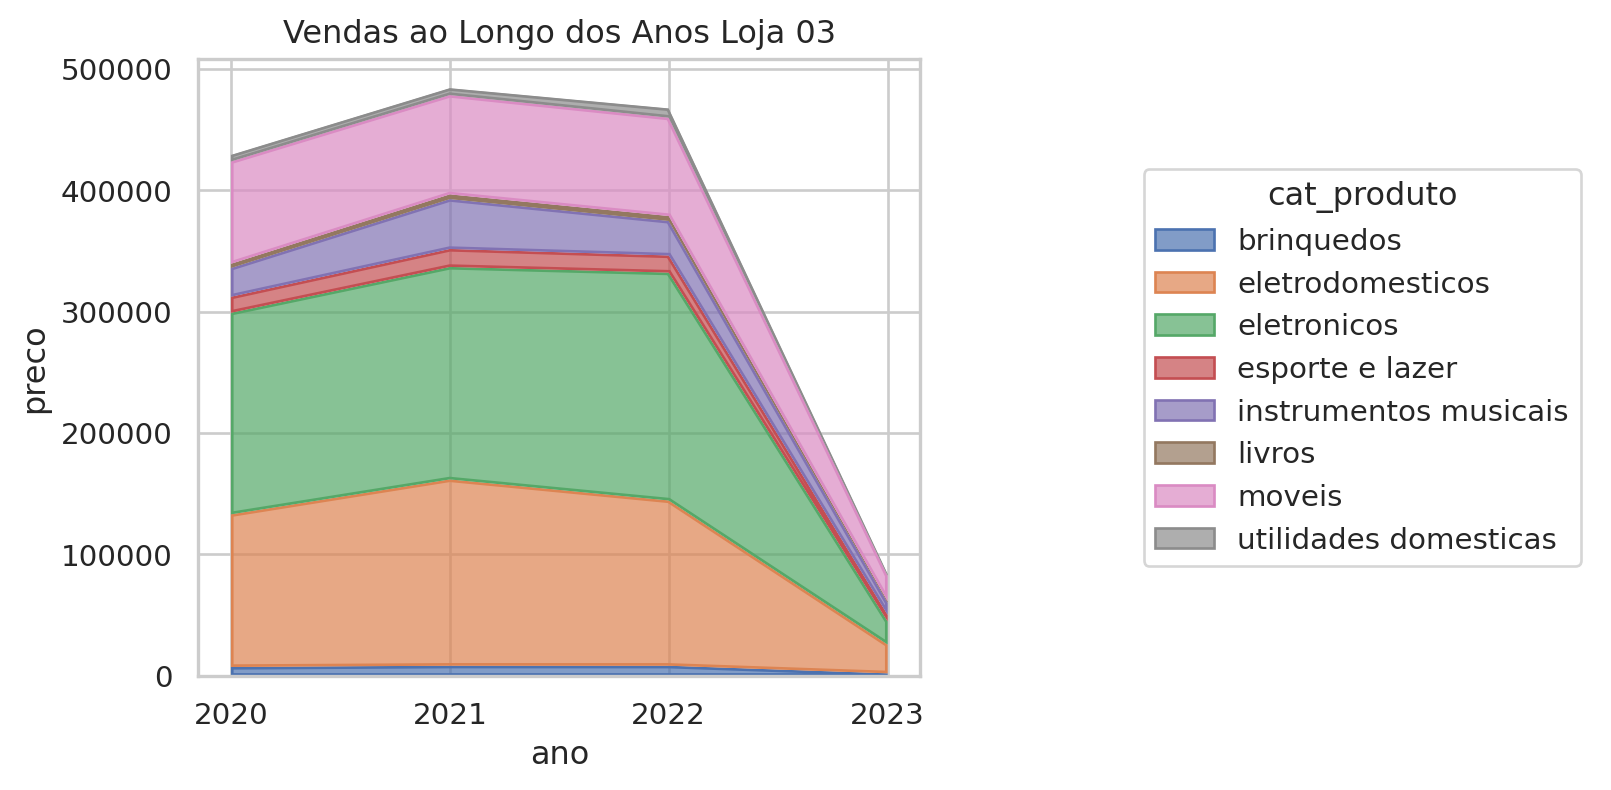

In [156]:
( # LOJA 03
    so.Plot(cat_loja3, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 03').scale(x=so.Continuous().tick(every=1))             
)

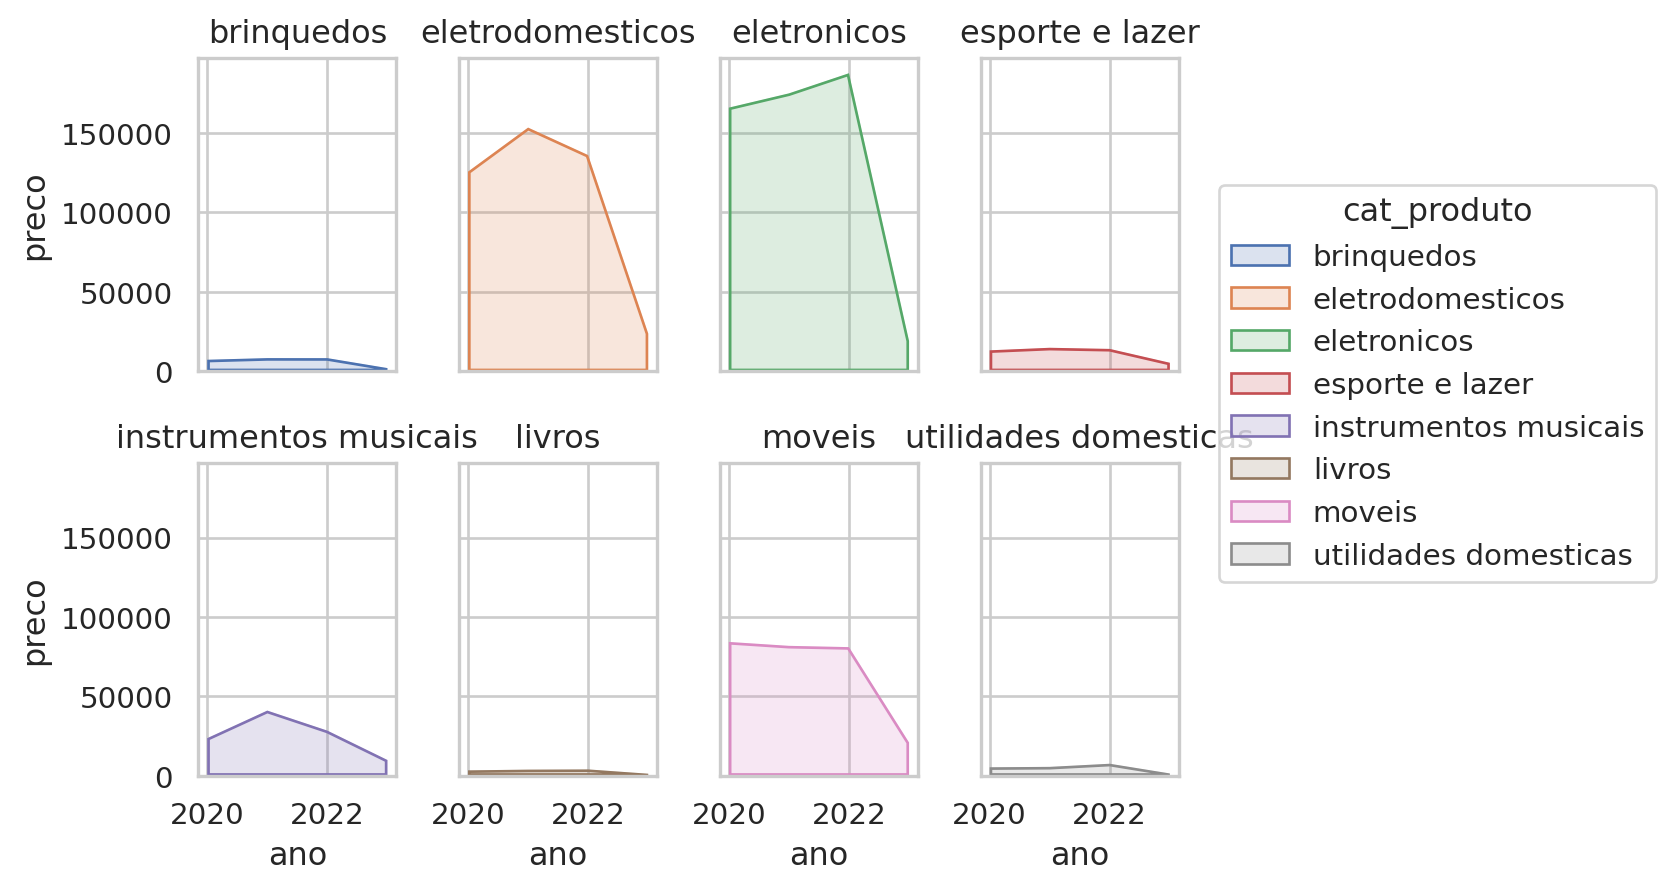

In [157]:
(
    so.Plot(cat_loja3, x='ano', y='preco').facet('cat_produto', wrap=4)
    .add(so.Area(),color='cat_produto').scale(x=so.Continuous().tick(every=2))
)

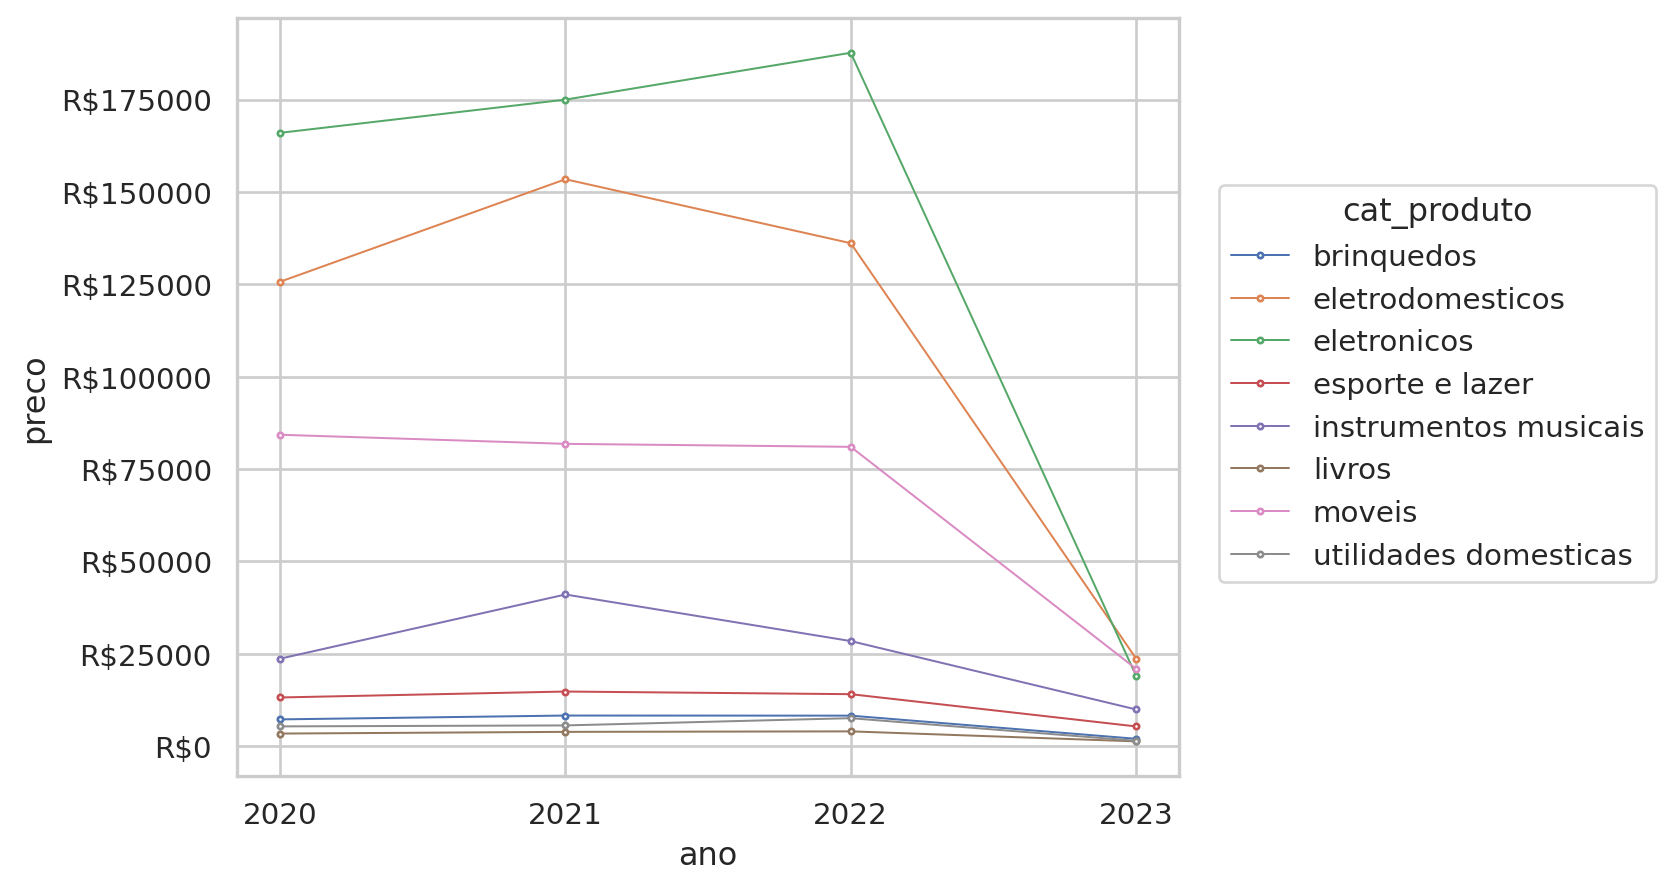

In [158]:
## LOJA 03
p3 = so.Plot(cat_loja3, y='preco', x='ano', color='cat_produto').scale(
    x=so.Continuous().tick(every=1),
    y=so.Continuous().label(like="R${x:g}")
)
p3.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))

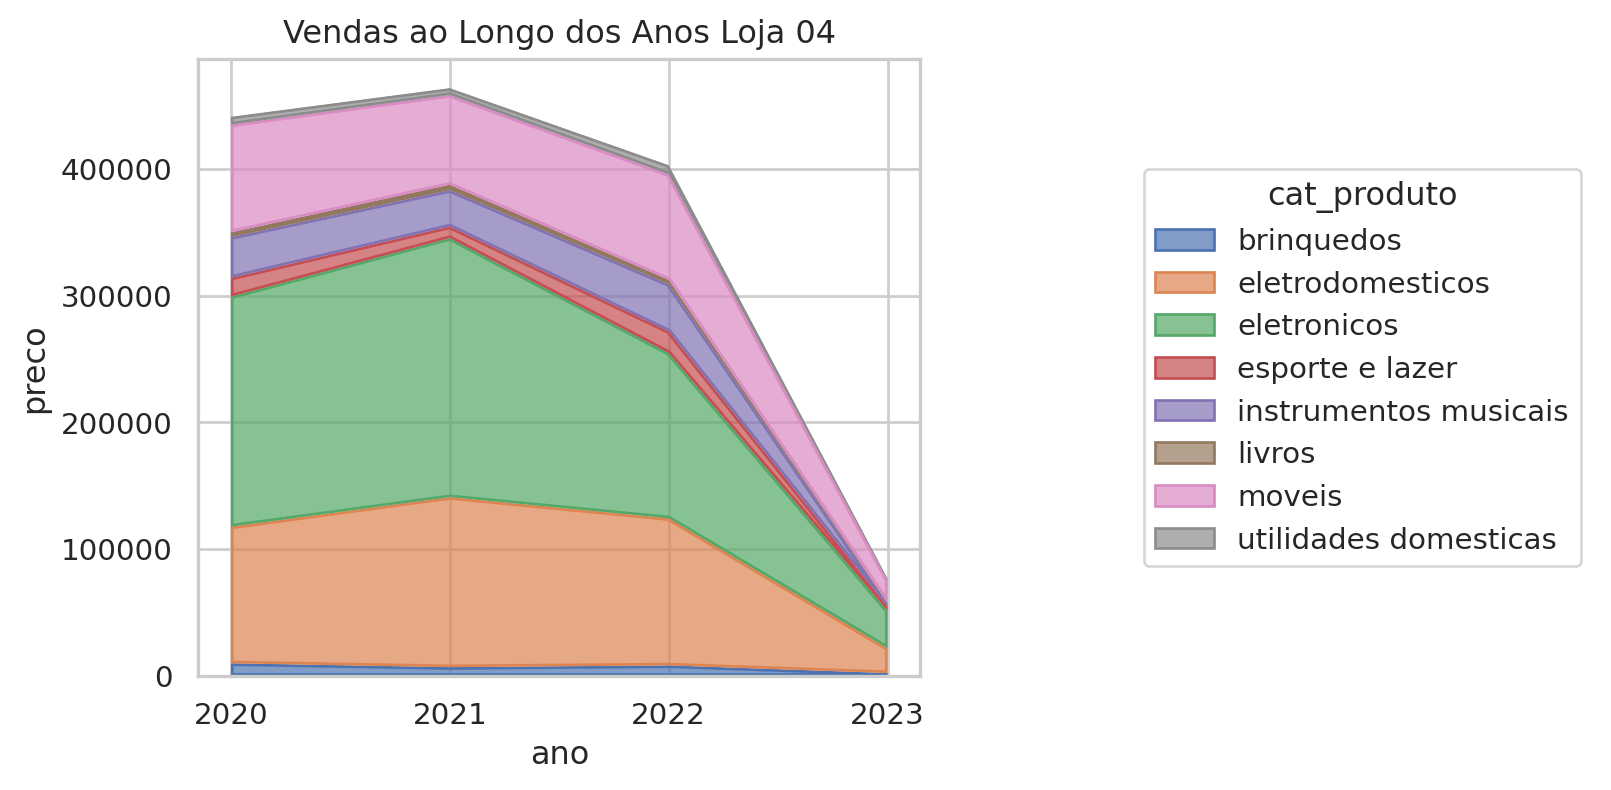

In [159]:
( # LOJA 04
    so.Plot(cat_loja4, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 04').scale(x=so.Continuous().tick(every=1))             
)

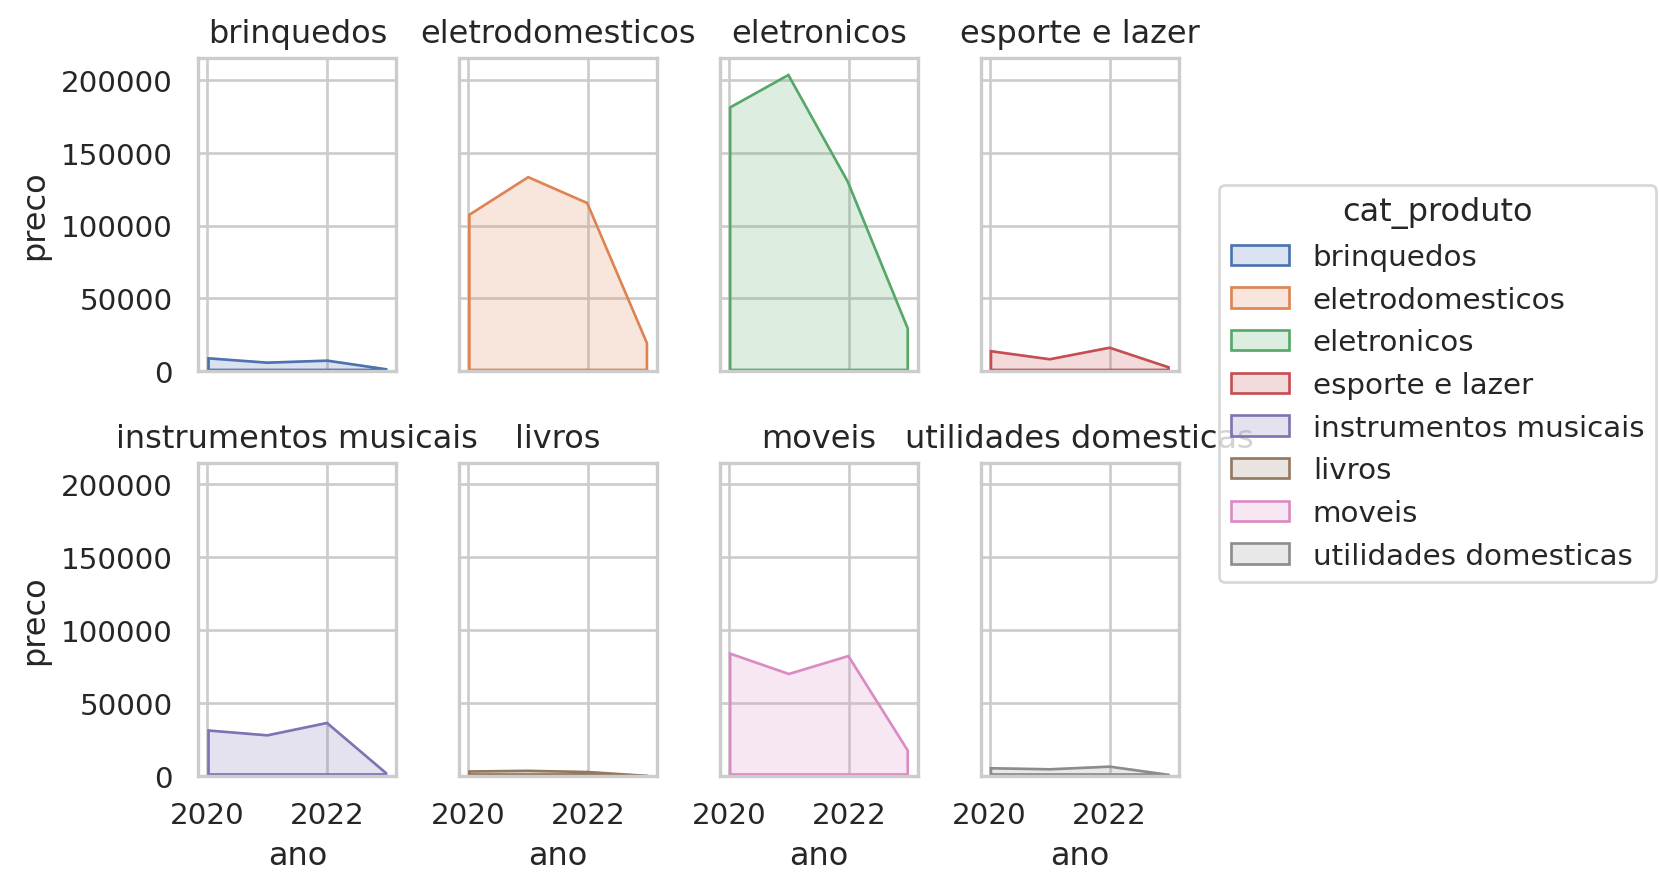

In [160]:
(
    so.Plot(cat_loja4, x='ano', y='preco').facet('cat_produto', wrap=4)
    .add(so.Area(),color='cat_produto').scale(x=so.Continuous().tick(every=2))
)

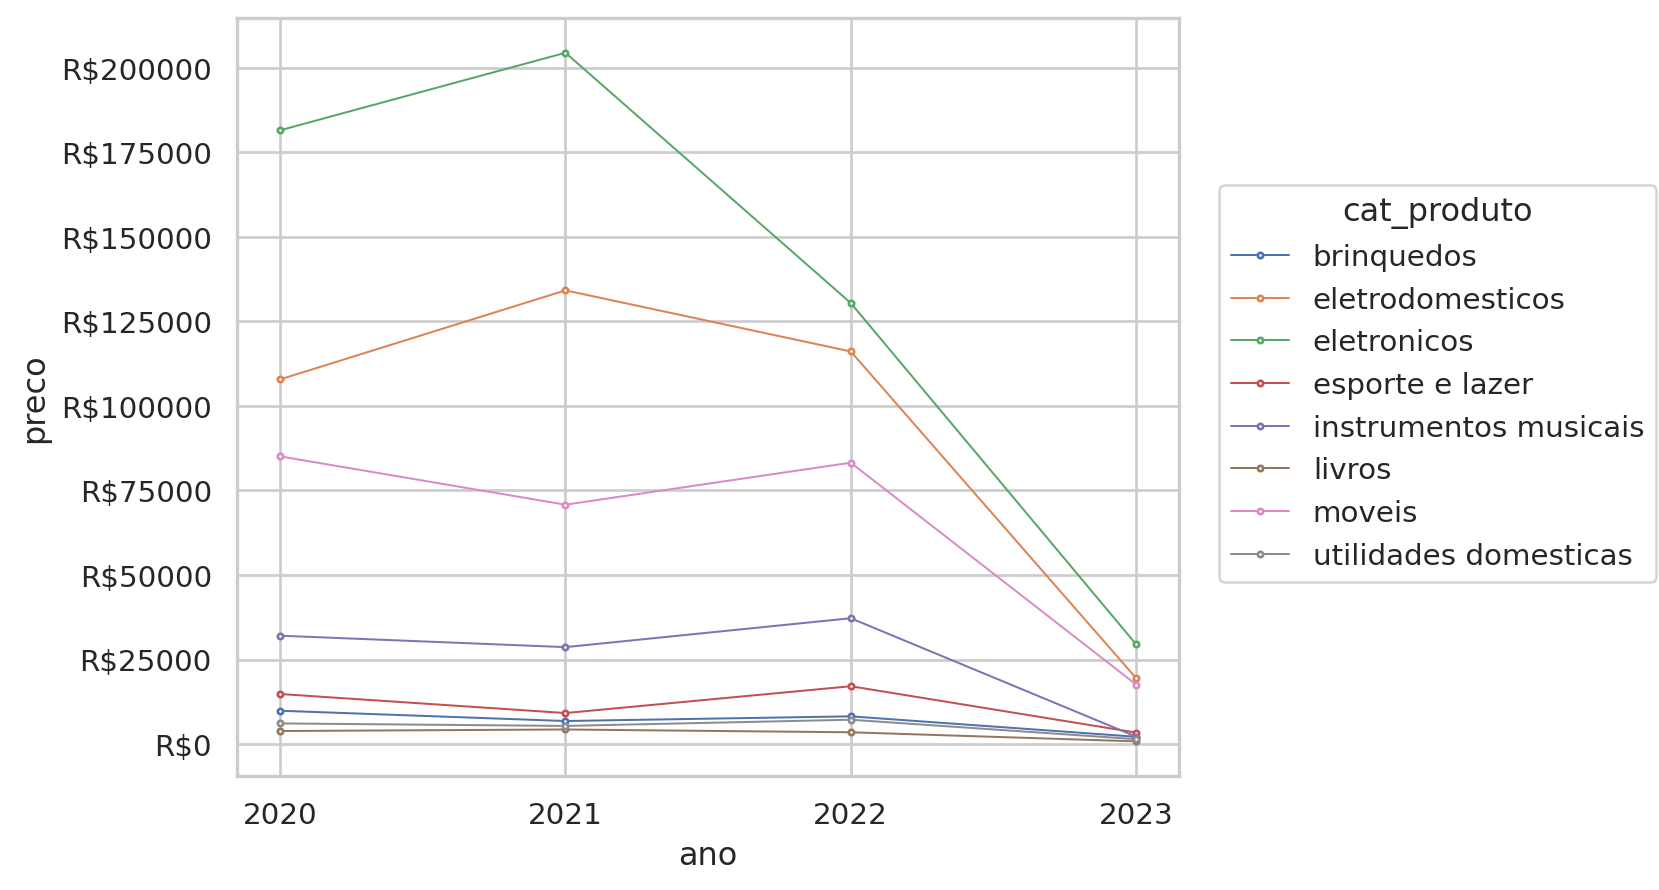

In [161]:
## LOJA 04
p4 = so.Plot(cat_loja4, y='preco', x='ano', color='cat_produto').scale(
    x=so.Continuous().tick(every=1),
    y=so.Continuous().label(like="R${x:.0f}")
)
p4.add(so.Path(marker="o", pointsize=2, linewidth=.75, fillcolor="w"))


# 3. Média de Avaliação das Lojas

In [162]:
# LOJA 01
notas_loja1 = loja1[['ano','nota_compra', 'produto']]
notas_loja1.insert(loc=0, column='LOJA', value='LOJA 01')
# LOJA 02
notas_loja2 = loja2[['ano','nota_compra','produto']]
notas_loja2.insert(loc=0, column='LOJA', value='LOJA 02')
# LOJA 03
notas_loja3 = loja3[['ano','nota_compra', 'produto']]
notas_loja3.insert(loc=0, column='LOJA', value='LOJA 03')
# LOJA 04 
notas_loja4 = loja4[['ano','nota_compra', 'produto']]
notas_loja4.insert(loc=0, column='LOJA', value='LOJA 04')


frames = [notas_loja4, notas_loja3, notas_loja2, notas_loja1]
lojas_produtos_notas = pd.concat(frames)
lojas_produtos_notas.rename(columns={'nota_compra':'media_nota_compra', 'LOJA': 'loja'}, inplace=True)

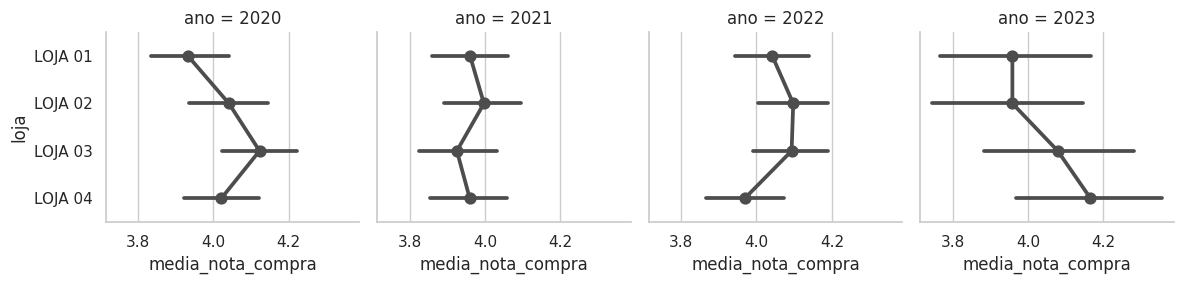

In [163]:
g = sns.FacetGrid(data=lojas_produtos_notas, col='ano', col_wrap=4)
g.map(sns.pointplot, "media_nota_compra", 'loja', order=['LOJA 01', 'LOJA 02', 'LOJA 03', 'LOJA 04'], color=".3", errorbar="ci")

# 4. Produtos Mais e Menos Vendidos

In [164]:
## Contar os produtos mais e menos vendidos por ano e loja
df_contagem = lojas_produtos_notas.groupby(['ano', 'loja'])['produto'].value_counts().reset_index()

max_ano_loja = df_contagem.groupby(['ano', 'loja'])['count'].max().reset_index()
min_ano_loja = df_contagem.groupby(['ano', 'loja'])['count'].min().reset_index()

min_ano_loja.rename(columns={'count':'min_vendidos'}, inplace=True)
max_ano_loja.rename(columns={'count':'max_vendidos'}, inplace=True)


In [165]:
df_contagem_max = pd.merge(max_ano_loja, df_contagem, how='inner', left_on=['ano','loja', 'max_vendidos'], right_on=['ano','loja', 'count'])
df_contagem_min = pd.merge(min_ano_loja, df_contagem, how='inner', left_on=['ano','loja', 'min_vendidos'], right_on=['ano','loja', 'count'])

df_contagem_min.drop(columns='count', inplace=True)
df_contagem_max.drop(columns='count', inplace=True)

df_contagem_max.head()

,ano,loja,max_vendidos,produto
0,2020,LOJA 01,25,Lava louças
1,2020,LOJA 02,23,Iniciando em programação
2,2020,LOJA 03,22,Kit banquetas
3,2020,LOJA 04,25,Cama box
4,2021,LOJA 01,26,Micro-ondas


In [166]:
# Separar por Loja
df_final_l1 = pd.concat([df_contagem_max.query('loja == "LOJA 01"'), df_contagem_min.query('loja == "LOJA 01"')], ignore_index=True)
df_final_l2 = pd.concat([df_contagem_max.query('loja == "LOJA 02"'), df_contagem_min.query('loja == "LOJA 02"')], ignore_index=True)
df_final_l3 = pd.concat([df_contagem_max.query('loja == "LOJA 03"'), df_contagem_min.query('loja == "LOJA 03"')], ignore_index=True)
df_final_l4 = pd.concat([df_contagem_max.query('loja == "LOJA 04"'), df_contagem_min.query('loja == "LOJA 04"')], ignore_index=True)


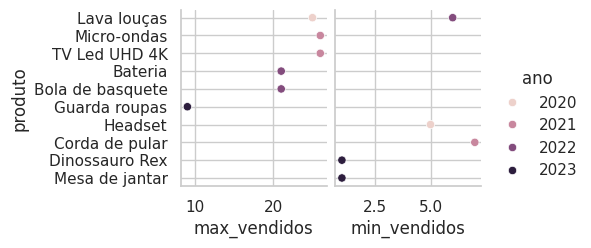

In [167]:
ay_loja1 = sns.pairplot(df_final_l1, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto', kind='scatter' )
ay_loja1.figure.align_titles()


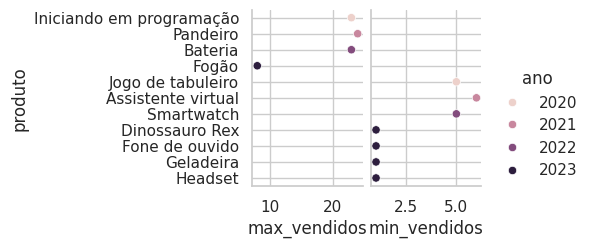

In [168]:
ay_loja2 = sns.pairplot(df_final_l2, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto' )
#ay_loja2.figure.suptitle('LOJA 02')
ay_loja2.figure.align_titles()

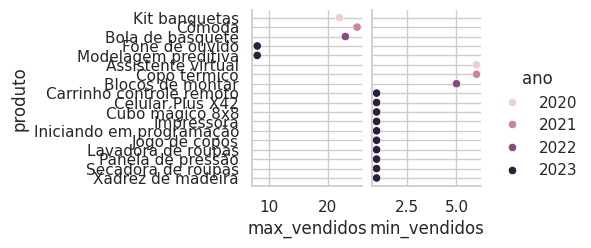

In [169]:
ay_loja3 = sns.pairplot(df_final_l3, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto')

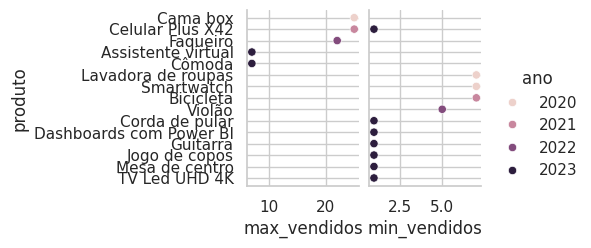

In [170]:
ay_loja4 = sns.pairplot(df_final_l4, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto')

# 5. Frete Médio por Loja


<Axes: xlabel='ano', ylabel='frete'>

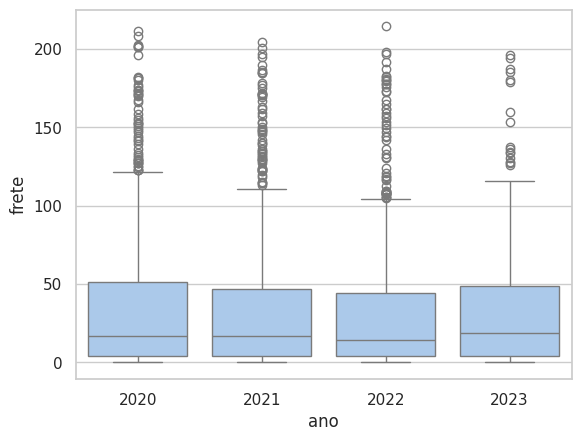

In [171]:
sns.boxplot(loja1, x='ano', y='frete')

In [172]:
loja1.frete.describe()

count    2359.000000
mean       34.691805
std        43.814183
min         0.000000
25%         4.141783
50%        16.498835
75%        48.050074
max       214.377060
Name: frete, dtype: float64

<Axes: xlabel='ano', ylabel='frete'>

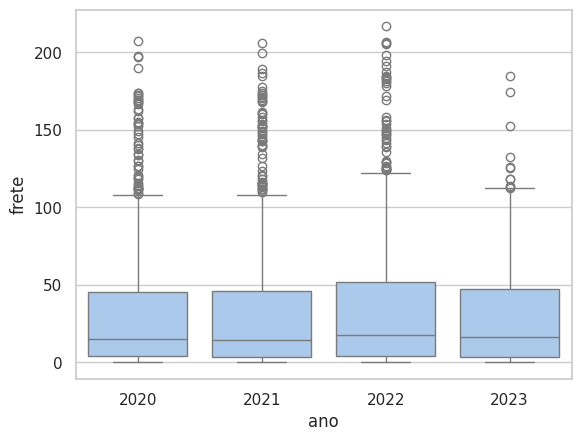

In [173]:
sns.boxplot(loja2, x='ano', y='frete')

<Axes: xlabel='ano', ylabel='frete'>

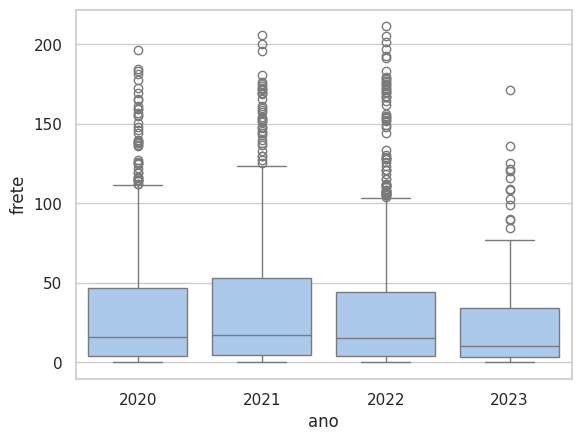

In [174]:
sns.boxplot(loja3, x='ano', y='frete')

<Axes: xlabel='ano', ylabel='frete'>

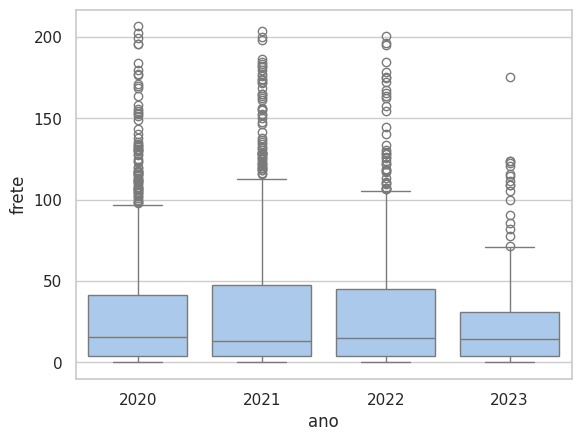

In [175]:
sns.boxplot(loja4, x='ano', y='frete')